In [2]:
# import libraries 
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
from dateutil import parser # convert time in date time data type
import time

In [24]:
dataset = pd.read_csv("D:/mallikarjuna/ML_Projects/FintechApp/newappdata10.csv")

In [25]:
dataset.head()

user               first_open  dayofweek  hour  age  numscreens  \
0  235136  2012-12-27 02:14:51.273          3     2   23          15   
1  333588  2012-12-02 01:16:00.905          6     1   24          13   
2  254414  2013-03-19 19:19:09.157          1    19   23           3   
3  234192  2013-07-05 16:08:46.354          4    16   28          40   
4   51549  2013-02-26 18:50:48.661          1    18   31          32   

   minigame  used_premium_feature  enrolled  liked  ...  SecurityModal  \
0         0                     0         0      0  ...              0   
1         0                     0         0      0  ...              0   
2         0                     1         0      1  ...              0   
3         0                     0         1      0  ...              0   
4         0                     0         1      1  ...              0   

   ResendToken  TransactionList  NetworkFailure  ListPicker  other  \
0            0                0               0           0      7   
1            0                0               0           0      5   
2            0                0               0           0      0   
3            0                0               0           0      6   
4            0                0               0           0     10   

   saving_count  credit_screens_count  cc_screens_count  loan_screens_count  
0             0                     0                 0                   1  
1             0                     0                 0                   1  
2             0                     0                 0                   1  
3             0                     3                 0                   1  
4             0                     2                 0                   1  

[5 rows x 51 columns]

In [26]:
# drop the column 'first_open' as this is a obeject of type string and will give error when we do the fit and transform
dataset = dataset.drop(columns = ['first_open'])

# data processing

In [27]:
dataset.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  location  ...  SecurityModal  ResendToken  \
0         0      0         0  ...              0            0   
1         0      0         1  ...              0            0   
2         0      1         0  ...              0            0   
3         1      0         1  ...              0            0   
4         1      1         0  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  other  saving_count  \
0                0               0           0      7             0   
1                0               0           0      5             0   
2                0               0           0      0             0   
3                0               0           0      6             0   
4                0               0           0     10             0   

   credit_screens_count  cc_screens_count  loan_screens_count  
0                     0                 0                   1  
1                     0                 0                   1  
2                     0                 0                   1  
3                     3                 0                   1  
4                     2                 0                   1  

[5 rows x 50 columns]

In [28]:
# enrolled column data is the output/response variable.
# so lets store them in an array
# drop the column 'enrolled' from the dataset
response = dataset['enrolled']
dataset = dataset.drop(columns = ['enrolled'])

In [29]:
# lets divinde the data into train and test split
# 80% towards training and 20% for test set
from sklearn.model_selection import train_test_split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response, test_size = .2, random_state =  0)

In [31]:
X_train


user  dayofweek  hour  age  numscreens  minigame  \
20330  315793          2    20   32           5         0   
17532  103347          1    21   22          42         1   
45819  373340          0     4   26          85         1   
34807  324006          4    13   25          24         1   
31888  248759          3    16   50          11         0   
...       ...        ...   ...  ...         ...       ...   
21243  312924          5    23   19           6         0   
45891  291893          0    15   22           4         1   
42613  221546          3     6   25          43         0   
43567  116320          4    13   27           4         1   
2732   259677          1    18   20          13         0   

       used_premium_feature  liked  location  Institutions  ...  \
20330                     1      1         0             0  ...   
17532                     0      0         1             1  ...   
45819                     0      0         0             1  ...   
34807                     0      0         1             0  ...   
31888                     0      0         1             0  ...   
...                     ...    ...       ...           ...  ...   
21243                     0      0         0             0  ...   
45891                     1      0         0             0  ...   
42613                     0      0         0             1  ...   
43567                     0      1         0             0  ...   
2732                      0      1         1             0  ...   

       SecurityModal  ResendToken  TransactionList  NetworkFailure  \
20330              0            0                0               0   
17532              0            0                0               0   
45819              0            0                0               0   
34807              0            0                0               0   
31888              0            0                0               0   
...              ...          ...              ...             ...   
21243              0            0                0               0   
45891              0            0                0               0   
42613              0            0                0               0   
43567              0            0                0               0   
2732               0            0                0               0   

       ListPicker  other  saving_count  credit_screens_count  \
20330           0      2             0                     0   
17532           0     13             0                     1   
45819           0     10             0                     2   
34807           0     10             0                     0   
31888           0      3             0                     2   
...           ...    ...           ...                   ...   
21243           0      2             0                     0   
45891           0      1             0                     1   
42613           0      4             6                     0   
43567           0      2             0                     0   
2732            0      7             0                     0   

       cc_screens_count  loan_screens_count  
20330                 0                   2  
17532                 0                   1  
45819                 1                   2  
34807                 0                   1  
31888                 0                   0  
...                 ...                 ...  
21243                 0                   0  
45891                 0                   1  
42613                 0                   0  
43567                 0                   0  
2732                  0                   1  

[40000 rows x 49 columns]

In [32]:
# we are going to link the user with the result, so we will store the user details and then we will delete that in X_train
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user'])

In [34]:
# we are going to link the user with the result, so we will store the user details and then we will delete that in X_test
test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [52]:
# feature scaling to get better results - StandardScaler rescales the data to have a mean of 0 and 
# a standard deviation of 1
# so that any large value will not sway the results to one way or another
from sklearn.preprocessing import StandardScaler


In [53]:
sc_X = StandardScaler()

In [54]:
# std scaler returns an numpy array, loses the index and the columns
# both index and columns are reuired for modelling. 
# hence the scaled part is stored in a diff df
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))


In [55]:
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

In [56]:
X_test2

0         1         2         3         4         5         6   \
0    -1.496239 -1.554724  0.866223  0.824043 -0.350843 -0.449198  2.262731   
1     0.958624 -0.882463 -0.535024  0.571073 -0.350843 -0.449198 -0.441944   
2    -1.496239  0.327606  0.492557 -0.630533 -0.350843  2.226191 -0.441944   
3     0.958624  0.865414 -1.002106 -0.504049 -0.350843 -0.449198  2.262731   
4     0.958624 -1.554724 -0.161358  0.697558 -0.350843 -0.449198 -0.441944   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.005267  1.268771  0.679390  0.634315 -0.350843 -0.449198 -0.441944   
9996 -1.496239 -0.075750  0.212308 -0.377564 -0.350843 -0.449198 -0.441944   
9997  0.958624  0.596510 -0.441608  2.974286 -0.350843 -0.449198  2.262731   
9998 -1.005267 -1.285819 -1.002106  0.254861 -0.350843 -0.449198 -0.441944   
9999  0.467652 -1.554724  5.443629  3.416983  2.850279 -0.449198 -0.441944   

            7         8         9   ...        38        39        40  \
0     0.976477 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
1     0.976477 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
2    -1.024090 -0.644537 -1.042085  ... -0.121722 -0.111594 -0.119159   
3    -1.024090 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
4    -1.024090 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
...        ...       ...       ...  ...       ...       ...       ...   
9995  0.976477 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
9996 -1.024090 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
9997 -1.024090  1.551501 -1.042085  ... -0.121722 -0.111594 -0.119159   
9998  0.976477 -0.644537  0.959615  ... -0.121722 -0.111594 -0.119159   
9999 -1.024090  1.551501  0.959615  ... -0.121722 -0.111594 -0.119159   

            41        42        43        44        45        46        47  
0    -0.089803 -0.088089  1.329613 -0.255034 -0.756633 -0.286358 -1.155734  
1    -0.089803 -0.088089  0.778912 -0.255034 -0.756633 -0.286358  0.322565  
2    -0.089803 -0.088089 -0.322491 -0.255034  0.066599 -0.286358  1.800864  
3    -0.089803 -0.088089  0.503561 -0.255034 -0.756633 -0.286358 -1.155734  
4    -0.089803 -0.088089 -0.597841  1.947331 -0.756633  3.027972 -1.155734  
...        ...       ...       ...       ...       ...       ...       ...  
9995 -0.089803 -0.088089  0.228211 -0.255034 -0.756633 -0.286358  0.322565  
9996 -0.089803 -0.088089  0.778912 -0.255034 -0.756633 -0.286358  0.322565  
9997 -0.089803 -0.088089 -0.322491 -0.255034  1.713064  3.027972  1.800864  
9998 -0.089803 -0.088089  0.778912 -0.255034 -0.756633 -0.286358 -1.155734  
9999 -0.089803 -0.088089  0.503561  2.681452 -0.756633 -0.286358 -1.155734  

[10000 rows x 48 columns]

the below commands will get back the index and the column name which were removed when we applied the standard scaler

In [57]:
X_train2.columns = X_train.columns.values

In [58]:
X_test2.columns = X_test.columns.values

In [59]:
X_test2.index = X_test.index.values

In [60]:
X_train2.index = X_train.index.values

In [61]:
X_train = X_train2
X_test = X_test2

In [62]:
X_train

dayofweek      hour       age  numscreens  minigame  \
20330  -0.504961  1.000837  0.025525   -1.026726 -0.346830   
17532  -0.997389  1.135280 -0.898034    1.328829  2.883254   
45819  -1.489818 -1.150250 -0.528611    4.066366  2.883254   
34807   0.479896  0.059736 -0.620967    0.182883  2.883254   
31888  -0.012532  0.463065  1.687932   -0.644744 -0.346830   
...          ...       ...       ...         ...       ...   
21243   0.972325  1.404166 -1.175102   -0.963062 -0.346830   
45891  -1.489818  0.328622 -0.898034   -1.090390  2.883254   
42613  -0.012532 -0.881364 -0.620967    1.392493 -0.346830   
43567   0.479896  0.059736 -0.436255   -1.090390  2.883254   
2732   -0.997389  0.731951 -1.082746   -0.517417 -0.346830   

       used_premium_feature     liked  location  Institutions  VerifyPhone  \
20330              2.186018  2.246319 -1.039218     -0.644848    -1.052581   
17532             -0.457453 -0.445173  0.962262      1.550753     0.950046   
45819             -0.457453 -0.445173 -1.039218      1.550753    -1.052581   
34807             -0.457453 -0.445173  0.962262     -0.644848    -1.052581   
31888             -0.457453 -0.445173  0.962262     -0.644848     0.950046   
...                     ...       ...       ...           ...          ...   
21243             -0.457453 -0.445173 -1.039218     -0.644848    -1.052581   
45891              2.186018 -0.445173 -1.039218     -0.644848    -1.052581   
42613             -0.457453 -0.445173 -1.039218      1.550753    -1.052581   
43567             -0.457453  2.246319 -1.039218     -0.644848    -1.052581   
2732              -0.457453  2.246319  0.962262     -0.644848     0.950046   

       ...  SecurityModal  ResendToken  TransactionList  NetworkFailure  \
20330  ...      -0.119697     -0.11742        -0.115879       -0.091207   
17532  ...      -0.119697     -0.11742        -0.115879       -0.091207   
45819  ...      -0.119697     -0.11742        -0.115879       -0.091207   
34807  ...      -0.119697     -0.11742        -0.115879       -0.091207   
31888  ...      -0.119697     -0.11742        -0.115879       -0.091207   
...    ...            ...          ...              ...             ...   
21243  ...      -0.119697     -0.11742        -0.115879       -0.091207   
45891  ...      -0.119697     -0.11742        -0.115879       -0.091207   
42613  ...      -0.119697     -0.11742        -0.115879       -0.091207   
43567  ...      -0.119697     -0.11742        -0.115879       -0.091207   
2732   ...      -0.119697     -0.11742        -0.115879       -0.091207   

       ListPicker     other  saving_count  credit_screens_count  \
20330   -0.087221 -1.147303     -0.260877             -0.763372   
17532   -0.087221  1.839740     -0.260877              0.057524   
45819   -0.087221  1.025092     -0.260877              0.878421   
34807   -0.087221  1.025092     -0.260877             -0.763372   
31888   -0.087221 -0.875753     -0.260877              0.878421   
...           ...       ...           ...                   ...   
21243   -0.087221 -1.147303     -0.260877             -0.763372   
45891   -0.087221 -1.418852     -0.260877              0.057524   
42613   -0.087221 -0.604204      3.976153             -0.763372   
43567   -0.087221 -1.147303     -0.260877             -0.763372   
2732    -0.087221  0.210444     -0.260877             -0.763372   

       cc_screens_count  loan_screens_count  
20330         -0.289185            1.785389  
17532         -0.289185            0.309800  
45819          1.336593            1.785389  
34807         -0.289185            0.309800  
31888         -0.289185           -1.165789  
...                 ...                 ...  
21243         -0.289185           -1.165789  
45891         -0.289185            0.309800  
42613         -0.289185           -1.165789  
43567         -0.289185           -1.165789  
2732          -0.289185            0.309800  

[40000 rows x 48 columns]

# model building

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
classifier = LogisticRegression(random_state = 0, penalty = 'l2')

In [66]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

In [45]:
cm = confusion_matrix(y_test, y_pred)

In [69]:
accuracy_score(y_test, y_pred)

0.7679

In [70]:
precision_score(y_test, y_pred)

0.760856513908345

In [71]:
recall_score(y_test, y_pred)

0.7715097402597403

In [49]:
f1_score(y_test, y_pred)

0.7661460957178842

accuracy score: 0.7679


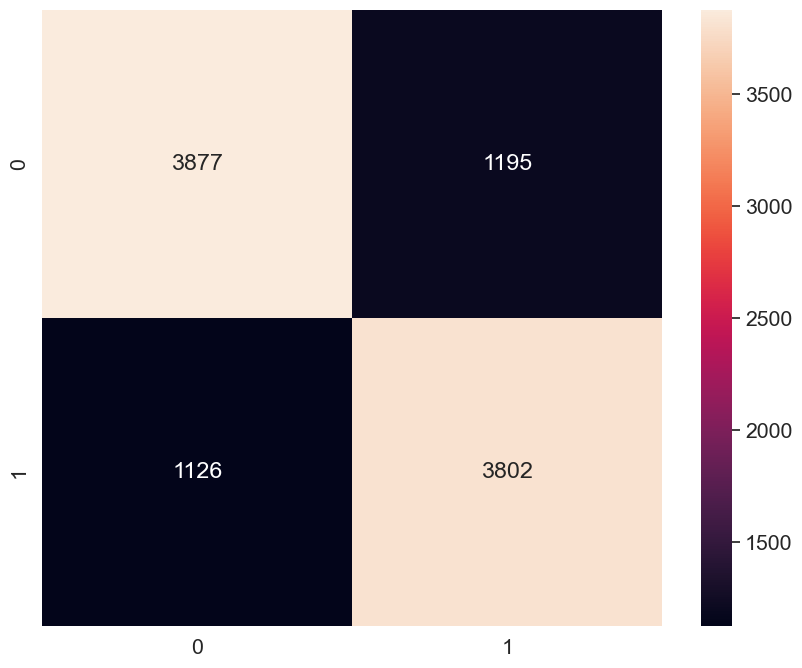

In [53]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot = True, fmt='g')
print('accuracy score: %0.4f'%accuracy_score(y_test, y_pred))

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [74]:
# std deviation is applied to an array - here we get an function and hence cant be multiplied by int again. 
# First convert std dev to float and then multiply
accuracies_std_dev = np.std(accuracies, dtype = np.float64)


In [75]:
accuracies_std_dev

0.004721030078277414

In [76]:
accuracies_std_dev = accuracies_std_dev * 2

In [77]:
# print('Logistic accuracy %0.3f (+/- %0.3f)'% accuracies.mean(), accuracies_std_dev)
print('Logistic accuracy {:.3f}, {:.3f}'.format(accuracies.mean(), accuracies_std_dev))

Logistic accuracy 0.767, 0.009


# formatting results

In [84]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [85]:
final_results['predicted_results'] = y_pred

In [86]:
final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)

user  enrolled  predicted_results
0     0.499780         1                  1
1     0.870829         1                  1
2    -0.817445         0                  0
3    -0.148481         1                  1
4     0.479132         1                  1
...        ...       ...                ...
9995 -0.400893         1                  0
9996 -0.883839         1                  1
9997  0.579206         0                  0
9998 -0.406646         1                  1
9999  0.868138         1                  1

[10000 rows x 3 columns]

# Final results

In [79]:
final_results = pd.concat([test_identifier, y_test], axis = 1)

In [80]:
final_results

user  enrolled
11841  239786         1
19602  279644         1
45519   98290         0
25747  170150         1
42642  237568         1
...       ...       ...
25091  143036         1
27853   91158         1
47278  248318         0
37020  142418         1
2217   279355         1

[10000 rows x 2 columns]

In [81]:
final_results['predicted_results'] = y_pred

In [82]:
final_results

user  enrolled  predicted_results
11841  239786         1                  1
19602  279644         1                  1
45519   98290         0                  0
25747  170150         1                  1
42642  237568         1                  1
...       ...       ...                ...
25091  143036         1                  0
27853   91158         1                  1
47278  248318         0                  0
37020  142418         1                  1
2217   279355         1                  1

[10000 rows x 3 columns]